In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('water.csv')
del df['Unnamed: 0']
df.head(10)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
7,South,Bournemouth,1299,78
8,North,Bradford,1637,10
9,South,Brighton,1359,84


In [3]:
len(df)

61

**Задача 1** - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построим точечный график

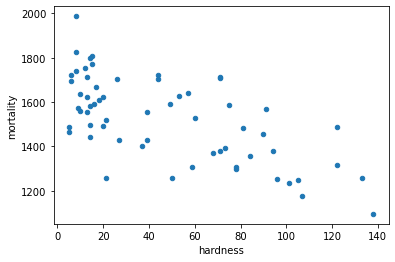

In [4]:
df.plot(kind='scatter', x='hardness', y='mortality')

По графику видна обратная линейная связь между жёсткостью воды и средней годовой смертностью.

Рассчитаем коэффициенты корреляции Пирсона и Спирмена

In [5]:
df[['hardness', 'mortality']].corr() # Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
df[['hardness', 'mortality']].corr(method='spearman') # Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Действительно, между жёсткостью воды и средней годовой смертностью существует средняя обратная линейная связь.

Построим модель линейной регрессии прогнозирующую среднегодовую смертность в зависимости ио жестскости воды.

In [7]:
X = df[['hardness']]
y = df['mortality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(X_train.shape)
print(y_train.shape)

(48, 1)
(48,)


In [10]:
print(X_test.shape)
print(y_test.shape)

(13, 1)
(13,)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print(model.coef_, model.intercept_)

[-3.40606438] 1685.681488342485


In [13]:
model.intercept_

1685.681488342485

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1409.7902735 , 1443.85091731, 1641.40265139, 1552.84497749,
       1637.99658701, 1552.84497749, 1637.99658701, 1420.00846664,
       1597.12381444, 1430.22665978, 1365.51143655, 1668.65116644,
       1341.66898588])

Расчитаем коэффициент детерминации.

In [15]:
r2_score(y_test, y_pred)

0.17478222740923366

Выведем график остатков.

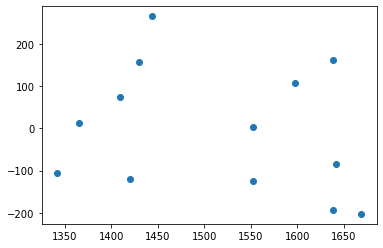

In [16]:
plt.scatter(y_pred,  y_test - y_pred)

По графику не наблюдается закономерностей, нет выбросов, остатки ведут себя достаточно хаотично.

**Задача 2.** Сохраняется ли аналогичная зависимость для По графику видна обратная линейная связь между жёсткостью воды и средней годовой смертностью. и южных городов по отдельности?

Разделем данные на северные и южные города.

In [17]:
south = df[df['location'] == 'South']

In [18]:
north = df[df['location'] == 'North']

In [19]:
len(south)

26

In [20]:
len(north)

35

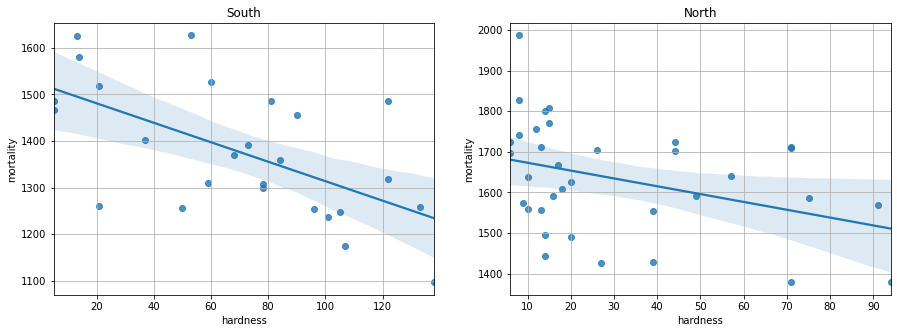

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=south['hardness'], y=south['mortality'])
plt.title('South')
plt.grid(True)          
plt.subplot(1, 2, 2)
sns.regplot(x=north['hardness'], y=north['mortality'])
plt.title('North')
plt.grid(True)

In [22]:
print('South') 
print(south[['hardness', 'mortality']].corr())
print()
print('North')
print(north[['hardness', 'mortality']].corr())

South
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

North
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000


In [23]:
print('South') 
print(south[['hardness', 'mortality']].corr(method='spearman'))
print()
print('North')
print(north[['hardness', 'mortality']].corr(method='spearman'))

South
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000

North
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


По произведенным расчетам коэффициентов корреляции можно сделать вывод, что обратная линейная зависимость между жёсткостью воды и средней годовой смертностью по всем городам сохраняется для южных городов, не не сохраняется для северных.

**Модель south**

In [24]:
X2 = south[['hardness']]
y2 = south['mortality']

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [26]:
print(X2_train.shape)
print(y2_train.shape)

(20, 1)
(20,)


In [27]:
print(X2_test.shape)
print(y2_test.shape)

(6, 1)
(6,)


In [28]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [29]:
print(model2.coef_, model2.intercept_)

[-2.04188848] 1519.461515319951


In [30]:
y_pred2 = model2.predict(X2_test)
y_pred2

array([1396.9482067 , 1509.25207294, 1380.61309889, 1347.94288326,
       1360.19421412, 1305.06322524])

In [31]:
r2_score(y2_test, y_pred2)

0.575930582612189

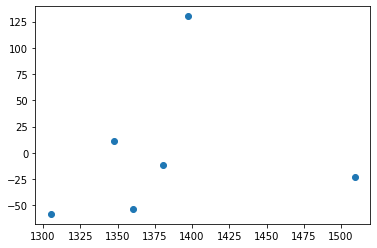

In [41]:
plt.scatter(y_pred2,  y2_test - y_pred2)

**Модель north**

In [32]:
X3 = north[['hardness']]
y3 = north['mortality']

In [33]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [34]:
print(X3_train.shape)
print(y3_train.shape)

(28, 1)
(28,)


In [35]:
print(X3_test.shape)
print(y3_test.shape)

(7, 1)
(7,)


In [36]:
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [37]:
print(model3.coef_,model3.intercept_)

[-1.62049655] 1678.3509426918051


In [38]:
y_pred3 = model3.predict(X3_test)
y_pred3

array([1615.15157738, 1665.38697032, 1654.04349449, 1662.14597723,
       1615.15157738, 1607.04909464, 1662.14597723])

In [40]:
r2_score(y3_test, y_pred3)

0.10397884727468376

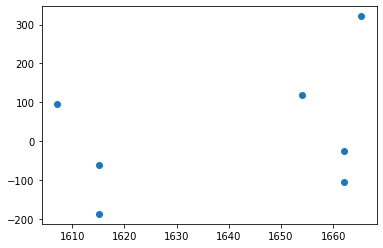

In [42]:
plt.scatter(y_pred3,  y3_test - y_pred3)

Таким образом, на соновании проведенного анализа можно сделать вывод, что обратная линейная связь между жёсткостью воды и средней годовой смертностью более характерна для северных городов. Это подтверждают расчитаные коэффициенты корреляции, а также построенные модели линейной регресси и расчет коэффициента детерминации, который в случае северных городов показывает, что наша модель работает почти как работала бы наивная модель и кроме того, график остатков показывает, что для данных по северным города не очень подходит модель линейной регрессии.